In [ ]:
from PIL import Image
import numpy as np

image = Image.open('image.png')

def to_X(image):
    return np.array(image)

X = to_X(image)
X.shape

array([[[  6,   9,  20, 255],
        [  5,   9,  20, 255],
        [  6,   8,  20, 255],
        ...,
        [ 15,  21,  35, 255],
        [ 16,  22,  38, 255],
        [ 16,  22,  38, 255]],

       [[  4,  10,  21, 255],
        [  4,  10,  20, 255],
        [  5,   9,  20, 255],
        ...,
        [ 15,  21,  35, 255],
        [ 17,  23,  38, 255],
        [ 16,  22,  38, 255]],

       [[  4,  10,  21, 255],
        [  4,  10,  20, 255],
        [  5,  10,  20, 255],
        ...,
        [ 15,  21,  35, 255],
        [ 16,  22,  38, 255],
        [ 16,  23,  39, 255]],

       ...,

       [[ 14,  18,  27, 255],
        [ 27,  30,  38, 255],
        [ 71,  72,  81, 255],
        ...,
        [  5,   9,  15, 255],
        [  5,   9,  14, 255],
        [  5,  10,  15, 255]],

       [[ 10,  16,  24, 255],
        [  8,  14,  23, 255],
        [  9,  12,  23, 255],
        ...,
        [  5,   9,  15, 255],
        [  4,   8,  14, 255],
        [  5,   9,  14, 255]],

       [[  8

In [15]:
size = 16

def to_sections(X):
    sections = []

    for r in range(X.shape[0]//size):
        for c in range(X.shape[1]//size):
            section = np.zeros((1, size*size*4))
            i = 0
            for r_i in range(size):
                for c_i in range(size):
                    for ch in range(4):
                        section[0, i] = X[r*size+r_i][c*size+c_i][ch]
                        i += 1
            sections.append(section)

    return np.concatenate(sections)

sections = to_sections(X)
sections.shape


(7540, 1024)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(sections)

[0.88782916 0.93153494 0.94616316 ... 1.         1.         1.        ]


In [25]:
pca10 = PCA(10).fit(sections)

sections_10 = pca10.inverse_transform(pca10.transform(sections))
sections_10.shape

(7540, 1024)

In [53]:
def from_sections(sections, shape=(1040, 1856, 4)):
    size = 16
    X = np.zeros(shape)
    section_idx = 0
    for r in range(X.shape[0] // size):
        for c in range(X.shape[1] // size):
            section = sections[section_idx]
            i = 0
            for r_i in range(size):
                for c_i in range(size):
                    for ch in range(4):
                        X[r * size + r_i, c * size + c_i, ch] = section[i]
                        i += 1
            section_idx += 1
    return X

def from_X(X):
    return Image.fromarray(X.astype(np.uint8))

def from_sections_with_pca(sections, pca):
    # print(len(pca.explained_variance_ratio_), pca.explained_variance_ratio_.sum(), size*size*4/len(pca.explained_variance_ratio_))
    return from_X(from_sections(pca.inverse_transform(pca.transform(sections))))

100 0.9973326371088981 10.24


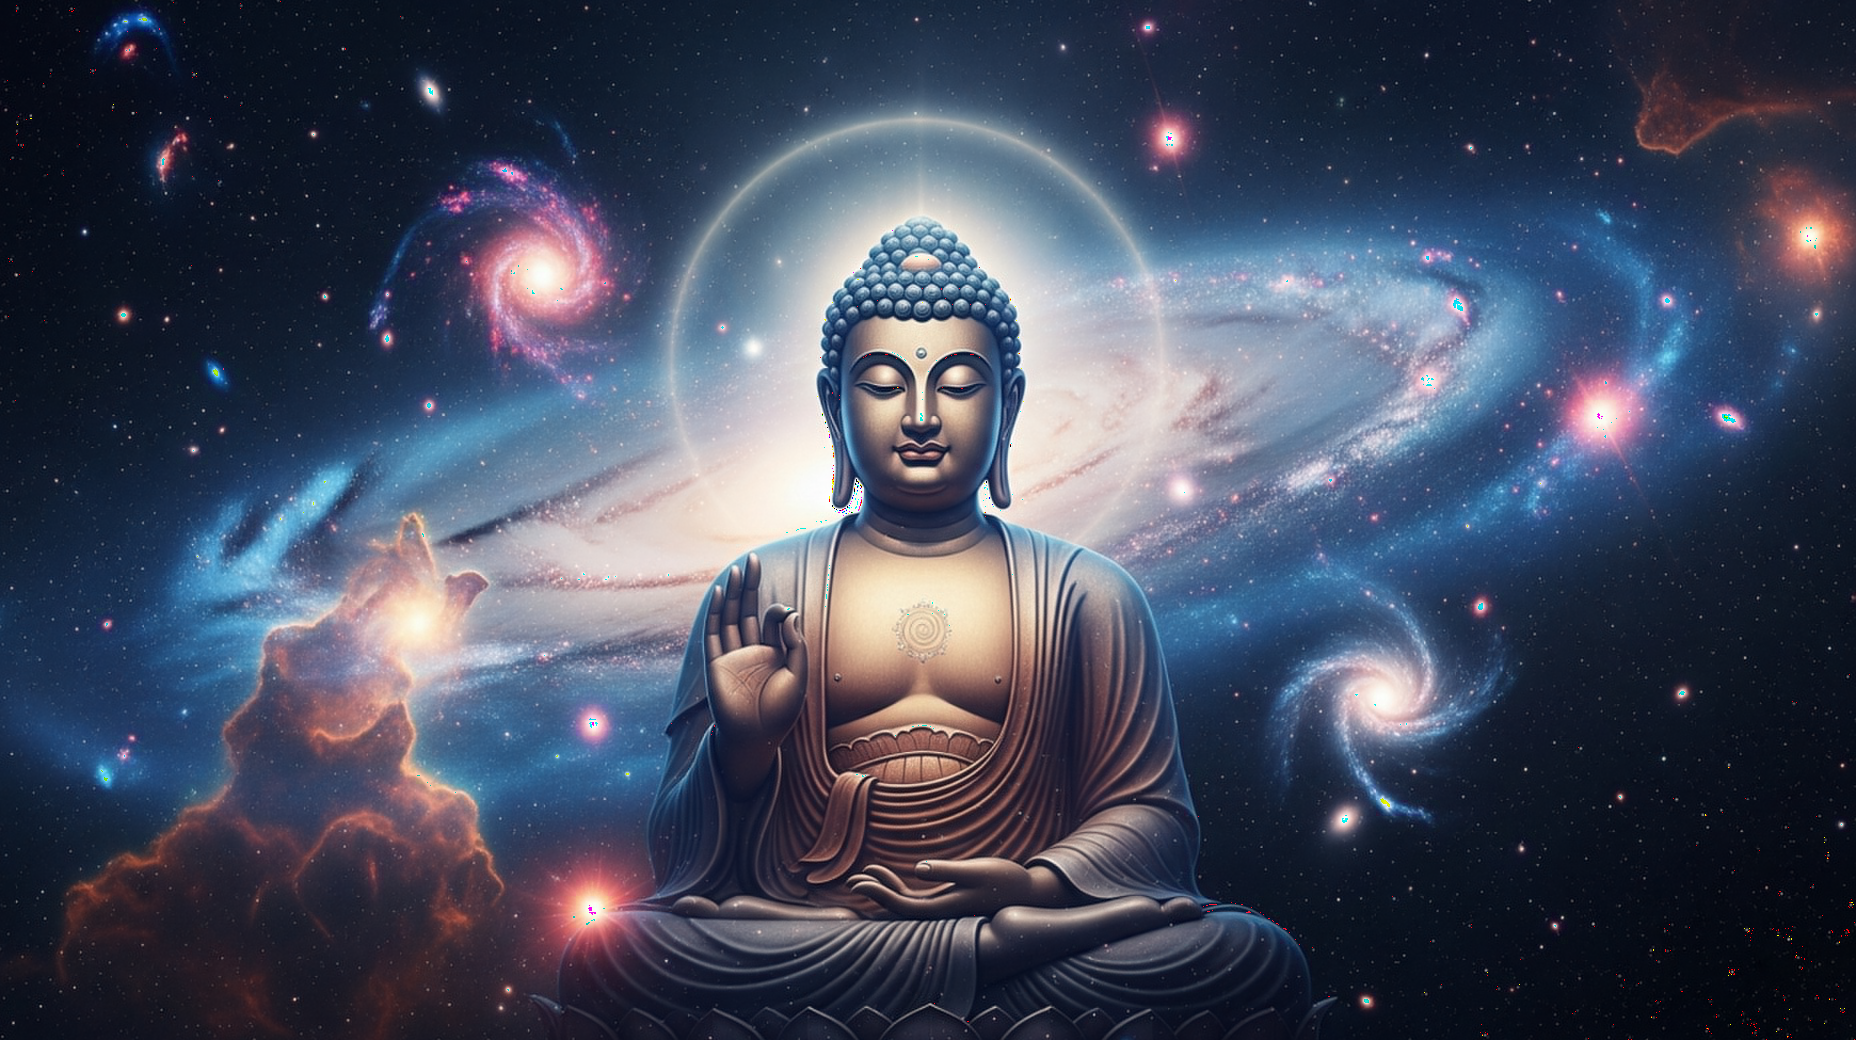

In [52]:
from_sections_with_pca(sections, PCA(100).fit(sections))

In [59]:
from sklearn.decomposition import KernelPCA

from_sections_with_pca(sections, KernelPCA(10, kernel='rbf', gamma=1, fit_inverse_transform=True).fit(sections))

ValueError: zero-size array to reduction operation maximum which has no identity